# Systolic Blood Pressure Data #

### Regression Problem: Predict systolic blood pressure ###

#### Importing Libraries ####

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
import math
from pandas.tools.plotting import scatter_matrix
import statsmodels.formula.api as sm
import statsmodels.stats.diagnostic as sms
from sklearn.preprocessing import scale
from sklearn.metrics import mean_squared_error
import plotly.offline as plot
import plotly.graph_objs as go
from sklearn import preprocessing
from sklearn.utils import shuffle
plot.offline.init_notebook_mode(connected=True)
import sklearn.model_selection as m_sel

#### Reading .csv file ####

In [3]:
SysBP = pd.read_csv("Ex03_SystolicBP_Regreesion.csv")
SysBP

,Age,Treated,Gender,FamilySize,Diet,Weight,Height,ScaledBMI,SystolicBP
0,45,1,0,2,2,99.149109,1.680932,35.090422,117.280944
1,62,1,1,4,1,76.609814,1.509772,33.609452,127.346514
2,61,1,0,2,2,72.619743,1.692017,25.365606,122.021401
3,51,1,0,3,2,73.858286,1.604062,28.704958,117.430179
4,42,1,0,2,1,83.861856,1.648855,30.846062,112.765810
5,56,1,1,2,1,66.470791,1.579815,26.632895,119.457681
6,66,0,0,4,2,89.829075,1.648000,33.075221,123.128291
7,60,1,0,3,1,100.565423,1.645454,37.143020,128.089503
8,46,0,0,1,2,91.589776,1.635356,34.247003,110.978105
9,45,0,0,2,2,76.058688,1.401059,38.746804,112.710507


#### Creating a correlation Matrix ####

In [4]:
corr_matrix = SysBP.corr()

#### Plotting the correlation Graph ####

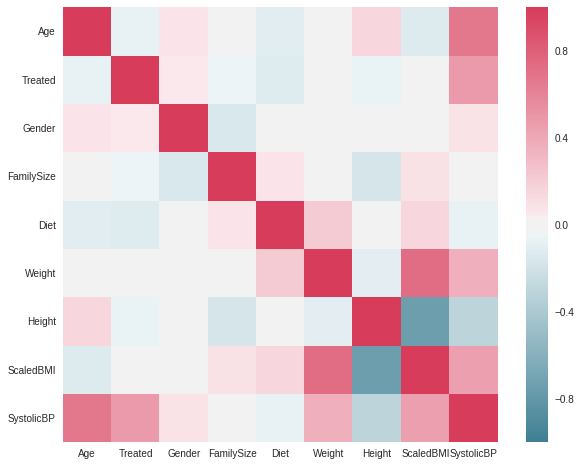

In [8]:
f, ax = plt.subplots(figsize = (10, 8))
sns.heatmap(corr_matrix, mask = np.zeros_like(corr_matrix, dtype = np.bool),
            cmap = sns.diverging_palette(220, 5, as_cmap = True),
            square = True, ax = ax)
plt.show()

#### Train the model using training sets with every feature ####

In [9]:
X_train = SysBP.loc[0 : 80, ['Age', 'Treated', 'Gender', 'FamilySize', 'Diet', 'Weight', 'Height', 'ScaledBMI']].as_matrix()
Y_train = SysBP.loc[0 : 80, ['SystolicBP']].as_matrix()
Y_org = SysBP.loc[80 : 100, ['SystolicBP']].as_matrix()
R = SysBP.drop('SystolicBP',axis = 1)

#### PLotting the ScatterPLot ####

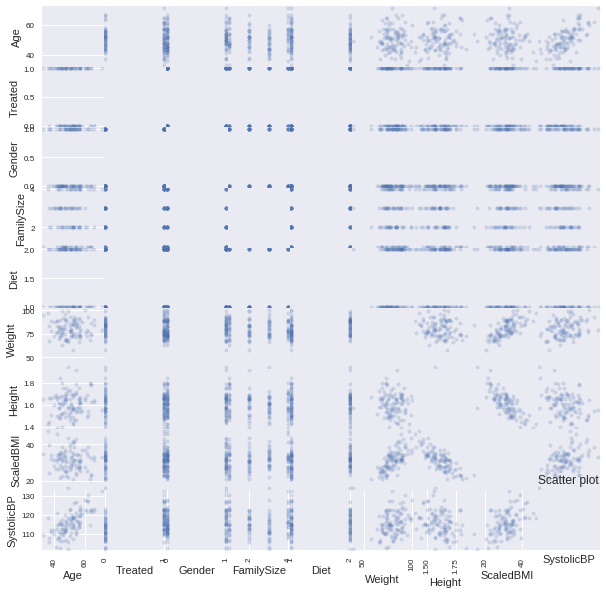

In [10]:
scatter_matrix(SysBP, alpha = .2, figsize = (10, 10), diagonal = 'kwe')
plt.plot(X_train, Y_train, linewidth = 3)
plt.xticks(())
plt.yticks(())
plt.title('Scatter plot')
plt.show()

## Model 1 ####

#### Plotting the graph of Original value vs predicted Value using model ####

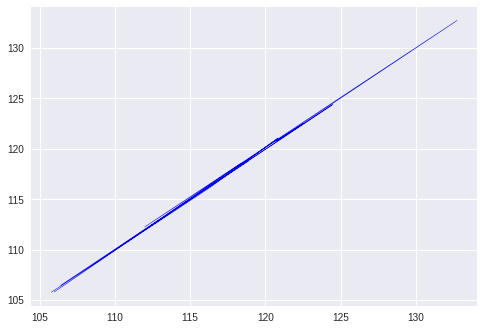

In [11]:

reg = linear_model.LinearRegression(normalize = True)
reg.fit (X_train, Y_train)
X_test = SysBP.loc[80 :,['Age', 'Treated', 'Gender', 'FamilySize', 'Diet', 'Weight', 'Height', 'ScaledBMI']].as_matrix()
Y_test = reg.predict(X_test)
plt.plot(Y_test, Y_org, color = "blue", linewidth = 0.5)
plt.show()

#### Root mean Square Value of original and the predicted value ####

In [9]:
math.sqrt(np.mean((Y_test - Y_org) ** 2))

0.11211344592194235

## Calculating the Ordinary Least Square Value of the model ##

In [10]:
ols_result = sm.ols(formula = "SystolicBP ~ Age + Treated + Gender + FamilySize + Diet + Weight + Height + ScaledBMI",
                    data = SysBP).fit()
ols_result.params

Intercept     60.103024
Age            0.650124
Treated        6.431615
Gender         0.035602
FamilySize    -0.004782
Diet          -0.039539
Weight        -0.000181
Height         0.691647
ScaledBMI      0.579271
dtype: float64

In [11]:
ols_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             SystolicBP   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.935e+04
Date:                Sun, 02 Apr 2017   Prob (F-statistic):          1.67e-157
Time:                        15:52:15   Log-Likelihood:                 82.718
No. Observations:                 100   AIC:                            -147.4
Df Residuals:                      91   BIC:                            -124.0
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     60.1030      1.017     59.116      0.000        58.083    62.123
Age            0.6501      0.002    422.118      0.000         0.647     0.653
Treated        6.4316      0.023    283.517      0.000         6.387     6.477
Gender         0.0356      0.023      1.564      0.121        -0.010     0.081
FamilySize    -0.0048      0.011     -0.452      0.652        -0.026     0.016
Diet          -0.0395      0.023     -1.700      0.093        -0.086     0.007
Weight        -0.0002      0.006     -0.029      0.977        -0.013     0.012
Height         0.6916      0.622      1.113      0.269        -0.543     1.927
ScaledBMI      0.5793      0.016     36.928      0.000         0.548     0.610
==============================================================================
Omnibus:                        2.345   Durbin-Watson:                   2.073
Prob(Omnibus):                  0.310   Jarque-Bera (JB):                1.731
Skew:                           0.250   Prob(JB):                        0.421
Kurtosis:                       3.406   Cond. No.                     1.08e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.08e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Plotting the Histogram ### 

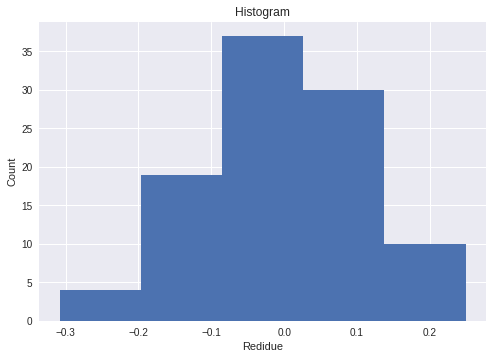

In [12]:
plt.hist(list(reg.predict(SysBP[['Age', 'Treated', 'Gender', 'FamilySize', 'Diet', 'Weight', 'Height', 'ScaledBMI']]).flatten() - SysBP['SystolicBP']), histtype='bar',bins=5)
plt.xlabel('Redidue')
plt.ylabel('Count')
plt.title('Histogram')
plt.show()

### Plotting the Boxplot ###

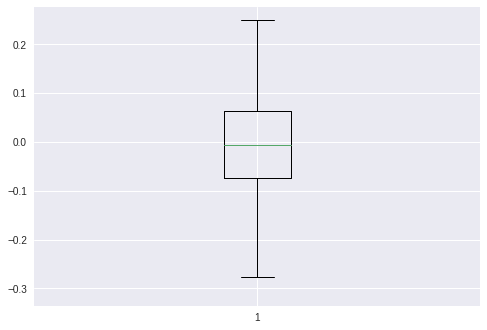

In [13]:
plt.boxplot(np.array(reg.predict(SysBP[['Age', 'Treated', 'Gender', 'FamilySize', 'Diet', 'Weight', 'Height', 'ScaledBMI']]).flatten() - SysBP['SystolicBP']))
plt.show()

### Goldfeld Quandt Test###

In [14]:
name = ['F Statistics', ' P Value']
test = sms.het_goldfeldquandt(ols_result.resid, ols_result.model.exog)
list(zip(name,test))

[('F Statistics', 0.82809059558140052), (' P Value', 0.725682617312431)]

## Model 2 ##
#### Train the model using training sets with less features####

In [15]:
X_train1 = SysBP.loc[0 : 80,['Age', 'Treated', 'Weight', 'Height', 'ScaledBMI']].as_matrix()
Y_train1 = SysBP.loc[0 : 80,['SystolicBP']].as_matrix()
Y_org1 = SysBP.loc[80 : 100,['SystolicBP']].as_matrix()


#### Plotting the graph of Original vallue vs predicted Value using model ####

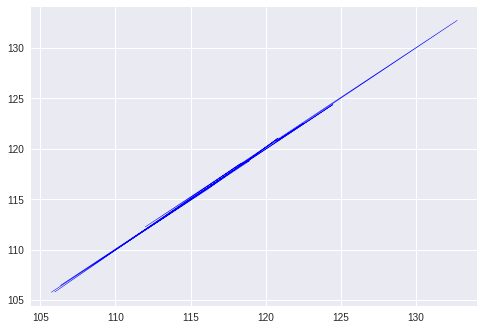

In [16]:
reg = linear_model.LinearRegression(normalize = True)
reg.fit (X_train1, Y_train1)
X_test1 = SysBP.loc[80 :,['Age', 'Treated', 'Weight', 'Height', 'ScaledBMI']].as_matrix()
Y_test1 = reg.predict(X_test1)
Y_test1
plt.plot(Y_test1, Y_org1, color = "blue", linewidth = 0.5)
plt.show()

#### Root mean Square Value of original and the predicted value ####

In [17]:
math.sqrt(np.mean((Y_test1 - Y_org1) ** 2))

0.11946426530635378

## Model 3 ##
#### Train the model using training sets with different combination of features####

In [18]:
X_train2 = SysBP.loc[0:80,['Age', 'Treated', 'Height', 'ScaledBMI']].as_matrix()
Y_train2 = SysBP.loc[0:80,['SystolicBP']].as_matrix()
Y_org2 = SysBP.loc[80:100,['SystolicBP']].as_matrix()


#### Plotting the graph of Original vallue vs predicted Value using model ####

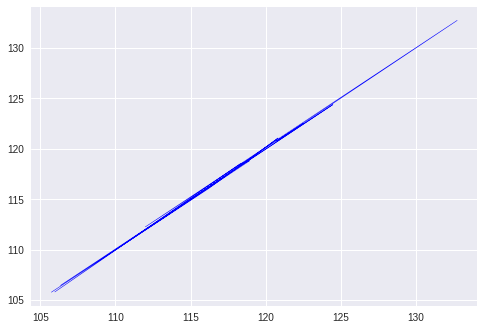

In [19]:
reg = linear_model.LinearRegression(normalize = True)
reg.fit (X_train2, Y_train2)
X_test2 = SysBP.loc[80:,['Age', 'Treated', 'Height', 'ScaledBMI']].as_matrix()
Y_test2 = reg.predict(X_test2)
plt.plot(Y_test2, Y_org2, color = "blue", linewidth = 0.5)
plt.show()

#### Root mean Square Value of original and the predicted value ####

In [20]:
math.sqrt(np.mean((Y_test2 - Y_org2) ** 2))

0.1184376011798185

# Ridge Regression #

In [14]:
alphas = np.logspace(-3, 3, 300)
ridge = linear_model.Ridge(normalize = True)
coefs = []
mean_errors = []
col_name1 = R.columns.tolist()
col_name = col_name1
col_name.append('alpha')
df = pd.DataFrame(index = list(range(len(alphas))),columns = col_name)
s = 0
for a in alphas:
    ridge.set_params(alpha = a)
    ridge.fit(X_train, Y_train)
    coefs.append(ridge.coef_)
    pred = ridge.predict(X_test) 
    print (ridge.coef_)
    mean_errors.append(mean_squared_error(Y_test, pred))
    k = 0
    while (k < len(col_name) - 1):
        df.loc[s, list(df.columns)[k]] = ridge.coef_[k]
        k = k + 1
    df.loc[s, 'alpha'] = a    
    s = s + 1
m = col_name1.pop()   

[[  6.49494629e-01   6.42382040e+00   3.21333669e-02  -2.48464028e-03
   -3.44385671e-02   1.48185566e-02  -7.78447790e-01   5.41378540e-01]]


IndexError: index 1 is out of bounds for axis 0 with size 1

## Weight Vs Alpha ##

In [52]:
data = []
for i in col_name1:
    p = go.Scatter(x= df.alpha, y = df.loc[:, i].tolist(), mode = 'lines+markers', name = i, hoverinfo = 'name', 
                   line = dict(shape = 'linear'))
    data.append(p)        
layout = dict(
     title = 'Weight vs Alpha',
    xaxis = dict(
        title = 'Alpha'
    ),
    yaxis = dict(
        title = 'Weight'
    ),
    legend = dict(
        traceorder = 'reversed',
        font = dict(size = 16)
    )
)
fig = dict(data = data, layout = layout)
plot.iplot(fig, filename = 'W_vs_A')

## Mean Error Vs Alpha ##

In [53]:
data = []
p = go.Scatter(x = alphas, y = mean_errors, mode = 'lines+markers', name = 'Mean Error', hoverinfo = 'name', 
               line = dict(shape = 'linear'))
data.append(p)        
layout = dict(
    title = 'Mean Square Error VS Alpha',
    xaxis = dict(
        title = 'Alpha'
    ),
    yaxis = dict(
        title = 'Mean Square Error'
    ),
    legend = dict(
        traceorder = 'reversed',
        font = dict(size = 16)
    )
)
fig = dict(data = data, layout = layout)
plot.iplot(fig, filename = 'MeanErr_vs_Alpha')

# Lasso #

In [32]:
lasso = linear_model.Lasso(max_iter = 10000, normalize = True)
coefs = []
for a in alphas:
    lasso.set_params(alpha = a)
    lasso.fit((X_train), Y_train)
    coefs.append(lasso.coef_)
coefs = np.array(coefs) 

## Weight Vs Alpha ##

In [20]:
data = []
for beta in range(len(R.columns)):
    trace = go.Scatter(
        x = alphas,
        y = coefs[:, beta],
        mode = 'lines+markers',
        name = R.columns[beta],
        line = dict(shape = 'linear')
    )
    data.append(trace)
layout = dict(
    title = 'Weight Vs Alpha',
    yaxis = dict(
        range = [-3, 3],
        title = 'Weight'
    ),
    xaxis = dict(
        range = [0, 0.1],
        title = 'Alpha'
    ),
    legend = dict(
        traceorder = 'reversed',
        font = dict(size = 16)
    ))

fig = dict(data = data, layout = layout)
plot.iplot(fig, filename = 'Weight_vs_Alpha')

TypeError: list indices must be integers or slices, not tuple

## Lasso CV ##

In [ ]:
lassocv = linear_model.LassoCV(alphas = None, cv = 10, max_iter = 100000, normalize = True)
lassocv.fit(X_train, Y_train)
lasso.set_params(alpha = lassocv.alpha_)
lasso.fit(X_train, Y_train)
mean_squared_error(Y_test, lasso.predict(X_test))

In [ ]:
pd.Series(lasso.coef_, index = X_test.columns)